<a href="https://colab.research.google.com/github/pmpatel-udallas/BCCE2024/blob/main/BCCE_2024_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transitioning from Excel to Python for Chemistry Lab Data Analysis


Coding is one of the most useful and transferable skills in the modern age. This workshop assumes no previous knowledge of Python or computer science. The goal is not to teach you everything about Python, but to give you a gentle introduction through applied learning and practical problem solving so you will be equipped in case you wish to further explore this area.

Just like in experimental labs, it is not always practical to try to understand every detail in full. For example, we consider only the basic fundamentals behind the engineering of the lab instruments like the GC-MS or UV-vis. It is not the best use of our time to fully delve into the materials involved in the construction or the software engineering. As chemists, we are interested in the application and the broad scientific implications.

Likewise, we will try to understand the big picture in our coding labs. Don't get too caught up with how every single line or package works! Instead, focus on the concepts and implications for your area of chemistry.

## Getting Started

### Import Packages


Programming etiquette involves importing packages you need at the top of a respective script/notebook.

For most routine data analysis tasks in a chemistry lab, you will need four libraries:

1. numpy (numerical analysis)
2. scipy (scientific numerical analysis)
3. matplotlib (plotting)
4. pandas (getting data into Python)

These packages are so commonly used that abbreviations are used throughout the community (Stack Overflow)

`import numpy as np`

`import scipy`

`import matplotlib as mpl`

`import matplotlib.pyplot as plt`

`import pandas as pd`

> Note: scipy can be abbreviated as sp



In [3]:
# Pandas dataframe library
import pandas as pd

# Import standard packages for numerical operations
import numpy as np

# Import plotting packages
import matplotlib.pyplot as plt

# If you want to change the font size of all plots to 16
#import matplotlib as mpl
#mpl.rcParams.update({'font.size': 16}) # Change the default font size to 16 pt.

# Import standard package for linear regression (generates uncertanties along with results)
import scipy
from scipy import stats

# Other scipy packages can be imported for things like derivation and integration.

#from scipy.misc import derivative
#from scipy.integrate import quad


### Text blocks



Text blocks in Colab and Jupyter notebook enviroments use Markdown language for text. Double click on this block to edit the corresponding text. Feel free to look through other text blocks in this notebook.

Here are some options within a text block.

Bold: **bold text**

Italics: *italicized text*

```
# This is formatted as code
```
[hyperlink to Google](https://www.google.com)


*   Unnumbered item
*   List item

1.   List item

> (Blockquotes) If you are familiar with $\LaTeX$, then you can use that syntax for formatting math equations and greek letters in text blocks and in plots.

$$
\hat{H}\Psi=E\Psi
$$

$$\Delta G = \Delta H - T\Delta S$$

Place an equation in-text:
$\Delta G = \Delta H - T\Delta S$







# Part 1: How to import and plot data from Excel

Let's get familiar with the basics of plotting and importing data from Excel to Python

## 1. How to import data



A data scientist named Wes McKinney created the pandas library which provides a wealth of additional tools for working with data, and possibly the most endearing feature, the ability to call data based on labels.
    
By popular convention, pandas is imported as `import pandas as pd`

> Note that when importing data in Google Colab, you can either link your Google Drive by mounting their Google Drive by doing the following
```
from google.colab import drive
drive.mount('/content/drive')
```

 and then providing the full file path or uploading the data to the space with the folder icon (fifth icon on left sidebar).


### Reading/Writing Data

Most data you will find yourself working with will be best placed in a two-dimensional pandas object called a *DataFrame* which is always written with two capital letters. The columns can be accessed by column names and rows can be accesses by indices. This will essentially function as the Python version of an Excel spreadsheet.

Similar to NumPy, pandas contains multiple, convenient functions for reading/writing data directly to and from its own object types, and each function is suited to a specific file format. This includes CSV, HTML, JSON, SQL, Excel, and HDF5 files [among others](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

**Table 1.** Import/Export Functions in Pandas

| Function | Description |
|:-------: | :---------  |
|`read_csv()` and `to_csv()` | Imports/Exports data from/to a CSV file |
|`read_table()` and `to_table()` | General-purpose importer/exporter |
|`read_hdf5()` and `to_hdf5()` | Imports/Exports data from/to an HDF5 file |
|`read_clipboard()` and `to_clipboard()` | Transfers data to/from the clipboard\* to a Series or DataFrame |
|`read_excel()` and `to_excel()` | Reads/writes an Excel file|

In [9]:
# Using git commands to import sample data for this workshop
#!git clone https://github.com/pmpatel-udallas/BCCE2024.git

# Example of reading a csv file
pd.read_csv('BCCE2024/Data/MonteCarlo.csv')

,sample,slope,intercept,rvalue,pvalue,slope_error,intercept_error,student_t
0,0,1853.263436,8.454972,0.999389,2.016379e-14,21.606766,1.542495,2.262157
1,1,1783.356772,12.162788,0.997317,1.565477e-11,43.634470,3.132264,2.262157
2,2,1745.780256,14.676048,0.998613,8.041297e-13,30.676812,2.198397,2.262157
3,3,1776.999032,12.718965,0.998188,2.676849e-12,35.703354,2.552976,2.262157
4,4,1760.375032,13.933093,0.999191,7.133874e-14,23.621566,1.689564,2.262157
...,...,...,...,...,...,...,...,...
99996,99996,1812.376975,10.998523,0.998249,2.297237e-12,35.798648,2.561063,2.262157
99997,99997,1787.416168,12.675947,0.996716,3.885713e-11,48.408834,3.479742,2.262157
99998,99998,1761.007340,13.291701,0.998786,4.427038e-13,28.954246,2.084024,2.262157
99999,99999,1861.371368,7.675090,0.998981,2.012778e-13,28.033138,1.997226,2.262157


In [12]:
# Example of reading a csv file
data1=pd.read_csv('BCCE2024/Data/MonteCarlo.csv',index_col='sample')
data1

,slope,intercept,rvalue,pvalue,slope_error,intercept_error,student_t
sample,,,,,,,
0,1853.263436,8.454972,0.999389,2.016379e-14,21.606766,1.542495,2.262157
1,1783.356772,12.162788,0.997317,1.565477e-11,43.634470,3.132264,2.262157
2,1745.780256,14.676048,0.998613,8.041297e-13,30.676812,2.198397,2.262157
3,1776.999032,12.718965,0.998188,2.676849e-12,35.703354,2.552976,2.262157
4,1760.375032,13.933093,0.999191,7.133874e-14,23.621566,1.689564,2.262157
...,...,...,...,...,...,...,...
99996,1812.376975,10.998523,0.998249,2.297237e-12,35.798648,2.561063,2.262157
99997,1787.416168,12.675947,0.996716,3.885713e-11,48.408834,3.479742,2.262157
99998,1761.007340,13.291701,0.998786,4.427038e-13,28.954246,2.084024,2.262157


In [20]:
# Perform mathematical operations on a row and update the row
# Data analysis in Python (rather than Excel)

# Update the current values in the rvalue column with the square (r^2)
data1.rvalue=data1.rvalue**2

#--------------------------------------------------------
# Change the slope to reciprocal slope (You code this).
# Don't worry about updating the column header


#--------------------------------------------------------

# Display the updated data
data1

,slope,intercept,rvalue,pvalue,slope_error,intercept_error,student_t
sample,,,,,,,
0,0.000540,8.454972,0.995122,2.016379e-14,21.606766,1.542495,2.262157
1,0.000561,12.162788,0.978735,1.565477e-11,43.634470,3.132264,2.262157
2,0.000573,14.676048,0.988961,8.041297e-13,30.676812,2.198397,2.262157
3,0.000563,12.718965,0.985598,2.676849e-12,35.703354,2.552976,2.262157
4,0.000568,13.933093,0.993544,7.133874e-14,23.621566,1.689564,2.262157
...,...,...,...,...,...,...,...
99996,0.000552,10.998523,0.986077,2.297237e-12,35.798648,2.561063,2.262157
99997,0.000559,12.675947,0.974024,3.885713e-11,48.408834,3.479742,2.262157
99998,0.000568,13.291701,0.990327,4.427038e-13,28.954246,2.084024,2.262157



**Table 2** More `pd.read_csv()` or `pd.read_excel()` Arguments

| Argument | Description |
|:--------:| :-------    |
|`delimiter`| Data separator; default is tab|
|`sep` | Data separator; default is tab|
|`skiprows` | Number of rows in file to skip before reading data|
|`skipfooter` | Number of rows at the bottom of the file to skip|
|`skip_blank_lines`| If `True`, skips blank lines in file; default is `False`|
|`header` | Row number to use for a data header; also accepts None if no header is provided in the file|
|`delim_whitespace` | Boolean argument indicating that data is separated by white space; default is `False`|
|`skipinitialspace` | If `True`, skips white space after delimiter|
|`index_col` | Column(s) to use as the row labels of the DataFrame |


In [16]:
# Example of reading an Excel sheet
data2=pd.read_excel('BCCE2024/Data/Gases.xlsx',sheet_name='Pressure')
data2

,time (sec),pressure (kPa)
0,0,99.113
1,1,99.076
2,2,99.113
3,3,99.076
4,4,99.076
...,...,...
96,96,99.076
97,97,99.076
98,98,99.038
99,99,99.076


**Table 3.** Summary of Pandas Indexing

| Index Method | Description |
|:-----------: | :---------  |
|`df[column]` | Index DataFrame with column name|
|`df.loc[row]` | Index DataFrame with row name|
|`df.loc[row, column]` | Index DataFrame with row and column names|
|`df.iloc[row, column]` | Index DataFrame with row and column default numerical index values|

In [18]:
# Navigate the columns
data1['pressure (kPa)']

0      99.113
1      99.076
2      99.113
3      99.076
4      99.076
        ...  
96     99.076
97     99.076
98     99.038
99     99.076
100    99.113
Name: pressure (kPa), Length: 101, dtype: float64

In [19]:
# Navigate the rows
data2.loc[100]

time (sec)        100.000
pressure (kPa)     99.113
Name: 100, dtype: float64

In [21]:
# Navigate the rows and columns
data2.loc[100,'pressure (kPa)']

99.113

## 2. How to plot data

Simple plots are easy to create and customize.

In [ ]:
# import the required module
import matplotlib.pyplot as plt

# x axis values
x = [1,2,3,4]

# corresponding y axis values
y = [200,400,600,800]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('x - axis (y units)')

# naming the y axis
plt.ylabel('y - axis (x units)')

# giving a title to my graph
plt.title('My first graph!')

# function to show the plot
plt.show()

There's plenty of other handy features for plotting, like setting the figure size, font size, x and y axis limits, and much more. Go ahead and take a look at the additional modifications to the graph below. See what changing each of the additions does.

There's a lot of flexibility in the plt.plot function for a wide variety of possible visualization options. For a full description of the options available, refer to the [plt.plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

Fix each one of the changes until the graph looks acceptable again, that is the data should be visible as should the title.

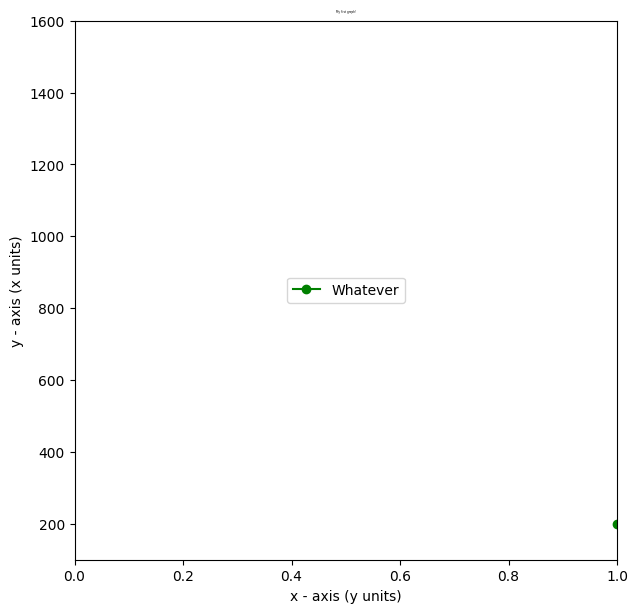

In [54]:
# import the required module
import matplotlib.pyplot as plt

# x axis values
x = [1,2,3,4]
# corresponding y axis values
y = [200,400,600,800]


#this sets the figure size
plt.figure(figsize=(7,7))

#this sets the y and y limits of the figure... but something isn't right!
plt.xlim(0, 1)
plt.ylim(100, 1600)

# plotting the points, note how you can change the marker and color
# You can also use hex codes like '#FFFFFF' in this section.
# Make the plot to have your school colors
plt.plot(x, y, '-o', color='green',label='Whatever')

#plot titles
plt.xlabel('x - axis (y units)')
plt.ylabel('y - axis (x units)')
plt.title('My first graph!', fontsize=2) #notice the fontsize

#Add a legend
plt.legend(loc='center')
plt.show()

### Plotting Options Reference Tables



**Table 4.** Common Matplotlib Marker Styles

| Argument | Description |
|:-------: | :--------:  |
| 'o'      |  circle |
| '*'    | star |
| 'p'    | pentagon |
| '^'    | triangle |
| 's'    | square   |


**Table 5.** Common Matplotlib Line Styles

| Argument | Description |
|:-------: | :---------: |
|  '-'   | solid |
| '--'   | dashed |
| '-.'   | dash-dot |
| ':'    | dotted |

**Table 6.** Common Matplotlib Colors

| Argument | Description |
|:------: | :--------: |
| 'b' | blue |
| 'r' | red  |
| 'k' | black (key) |
| 'g' | green |
| 'm' | magenta |
| 'c' | cyan |
| 'y' | yellow |


**Table 7.** A Few Common plot Keyword Arguments

| Argument | Description |
|:------:  | :--------:  |
|`linestyle` or `ls` | line style |
| `marker` | marker style |
|`linewidth` or `lw` | line width |
|`color` or `c` | line color |
|`markeredgecolor` or `mec` | marker edge color |
|`markerfacecolor` or `mfc` | marker color |
|`markersize` or `ms` | marker size |

**Table 8.** Legend Location

| Location String | Location Code |
|:---------------:| :-----------: |
|'best' (Axes only)|0 |
|'upper right'| 1|
|'upper left'|2|
|'lower left'|3|
|'lower right'|4|
|'right'|5|
|'center left'|6|
|'center right'|7|
|'lower center'|8|
|'upper center'|9|
|'center'|10|


### Compute and plot a best fit line

Follow the example below to see how to compute a trend line.

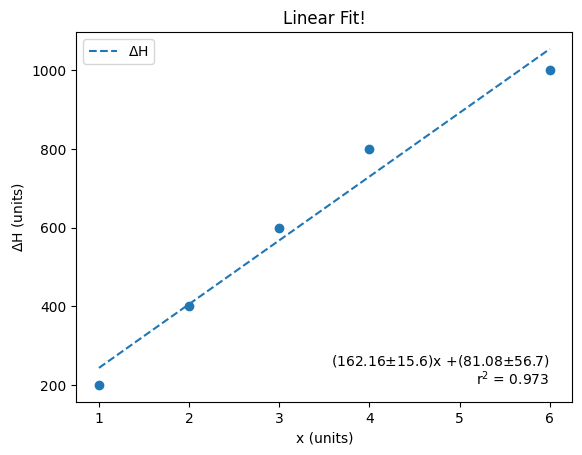

In [ ]:
# x, y axis values
x = [1,2,3,4,6]
y = [200,400,600,800,1000]

# plotting the points
plt.plot(x, y, 'o', color='C0')

# make the trend line.
best_fit = scipy.stats.linregress(x, y)
m = best_fit.slope
b = best_fit.intercept
me = best_fit.stderr
mb = best_fit.intercept_stderr
r2 = best_fit.rvalue**2

#plot the best fit line
X = np.linspace(min(x), max(x), 100)
Y = m*X + b
plt.plot(X, Y,'C0--',label='$\Delta$H')

#plot titles
plt.xlabel('x (units)')
plt.ylabel('$\Delta$H (units)')
plt.title('Linear Fit!', fontsize=12)

# Add text of the best fit equation and r^2 value
# plt.text(x,y,'text-to-add')
# 'text-to-add' must be a string (uses quotes and converts numbers to string with str type/function)

# Add text of the best fit equation
plt.text(6,250,'('+str(m.round(2))+'$\pm$'+str(me.round(1))+')'+'x +'\
         +'('+str(b.round(2))+'$\pm$'+str(mb.round(1))+')',horizontalalignment='right')

# Add text of the r^2 value
plt.text(6,200,'r$^2$ = '+str(r2.round(3)),horizontalalignment='right')

# Add a legend
plt.legend()

plt.show()

#### Compute the best fit line

In [ ]:
# x axis values
x = [1,2,3,4]
# corresponding y axis values
y = [200,400,600,800]


#this sets the figure size
plt.figure(figsize=(7,7))

#this sets the y and y limits of the figure... but something isn't right!
plt.xlim(0, 1)
plt.ylim(100, 1600)

#--------------------------------
#Code for the best fit line






#---------------------------------


# plotting the points, note how you can change the marker and color
# You can also use hex codes like '#FFFFFF' in this section.
# Make the plot to have your school colors
plt.plot(x, y, '-o', color='green',label='Whatever')

#plot titles
plt.xlabel('x - axis (y units)')
plt.ylabel('y - axis (x units)')
plt.title('My first graph!', fontsize=2) #notice the fontsize

#Add a legend
plt.legend(loc='center')
plt.show()

## 3. How would you visualize the data in the following spreadsheet?

### Example: Pressure vs. Volume for air

Pressure data in kPa at various volumes in mL.

In [44]:
gases=pd.read_excel('BCCE2024/Data/Gases.xlsx',sheet_name='P vs V')
gases

,Time,20,19,18,17,16,15,14,13,12,11,10
0,0,99.744486,105.798148,111.246376,118.208075,124.564341,132.433856,141.817064,151.502878,161.188468,176.625338,191.153946
1,1,100.047091,105.495319,111.246376,118.208075,125.169551,131.828646,142.119669,151.502878,161.491296,176.019905,191.153946
2,2,100.047091,105.495319,111.548981,118.510680,125.169551,132.131251,141.817064,151.502878,161.491296,176.625338,190.851118
3,3,99.744486,105.798148,111.246376,118.510680,124.261513,132.433856,142.119669,151.200050,161.491296,176.625338,190.851118
4,4,100.047091,105.798148,111.548981,118.510680,124.866946,131.828646,141.817064,151.502878,161.491296,176.322510,191.153946
...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,100.047091,105.798148,111.246376,118.510680,124.564341,131.828646,142.119669,151.200050,161.491296,176.322510,190.851118
97,97,100.047091,105.798148,111.548981,118.208075,124.866946,131.525818,142.119669,151.200050,161.491296,176.019905,190.851118
98,98,100.349919,105.495319,111.548981,118.208075,124.564341,131.525818,142.119669,151.805483,161.188468,176.019905,191.153946
99,99,99.744486,105.495319,111.246376,118.208075,124.866946,131.828646,141.817064,151.502878,161.491296,176.019905,190.851118


In [ ]:
# Generate plot with the gases dataframe







### Example: Penny Statistics

In lab, you and your lab mates measured the masses of 10000 pennies. Below are the results. Find a way to visualize the data.

**Is the distribution of masses described by a Gaussian function?**

**Is the mass of a penny consistent from year to year?**

**Can we clearly distinguish the copper-coated pennies from the brass ones?**

In [38]:
pennies=pd.read_excel('BCCE2024/Data/penny_data.xlsx')
pennies

,Year,Mass (g)
0,2006,2.436
1,1978,3.094
2,1996,2.633
3,1975,3.016
4,2002,2.499
...,...,...
9995,2003,2.428
9996,1976,3.082
9997,1972,3.114
9998,1970,2.984


In [ ]:
# Generate plots with the pennies dataset







### What are some other types of plots you can make with pandas DataFrames?

[Plot Types in Matplotlib](https://matplotlib.org/stable/plot_types/index.html)


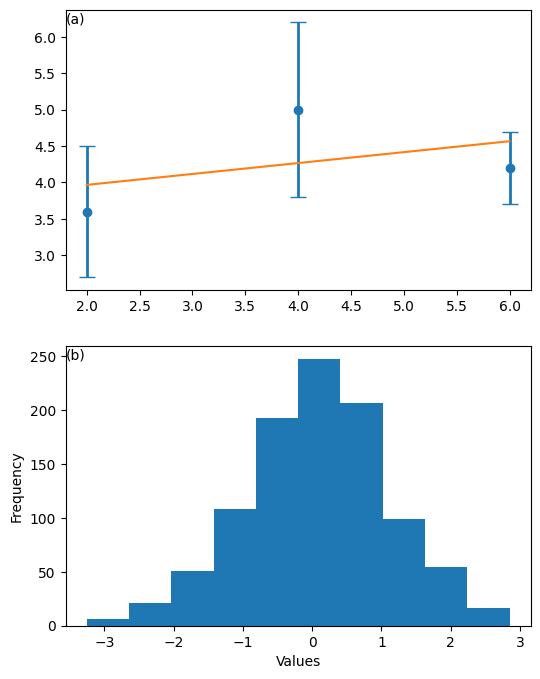

In [ ]:
# Use subplots to include more than 1 plot in a figure
fig, (ax,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

#Error Bar Plots
# make data:
x = np.array([2, 4, 6])
y = np.array([3.6, 5, 4.2])
yerr = np.array([0.9, 1.2, 0.5])

best_fit = scipy.stats.linregress(x, y)
m = best_fit.slope
b = best_fit.intercept

ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)
ax.plot(x,m*x+b)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#Create text in the top left corner of the plot
#Adjust these values as needed for aesthetics
ax.text(xmin,0.97*ymax,'(a)')

#Histogram
# Create a pandas dataframe of random values
df = pd.DataFrame(np.random.randn(1000), columns=['values'])

# Plot a histogram of the values in the dataframe

ax2.hist(df['values'], bins=10)
ax2.set_xlabel('Values') #Notice the different syntax for axes labels
ax2.set_ylabel('Frequency')

xmin2, xmax2 = ax2.get_xlim()
ymin2, ymax2 = ax2.get_ylim()

#Create text in the top left corner of the plot
#Adjust these values as needed for aesthetics
ax2.text(xmin2,0.95*ymax2,'(b)')

plt.show()
fig.savefig('test.png',dpi=300,bbox_inches='tight')

# Part 2: Import your own Excel spreadsheet and create a plot of your data

Upload your spreadsheet and plot your data as you would in Excel

# References



This notebook includes material from the following sources:

A Creative Commons Textbook for Teaching Scientific Computing to Chemistry Students with Python and Jupyter Notebooks *J. Chem. Educ.* **2021,** 98, 489-494 [DOI: 10.1021/acs.jchemed.0c01071](https://doi.org/10.1021/acs.jchemed.0c01071)

Scientific Computing for Chemists: An Undergraduate Course in Simulations, Data Processing, and Visualization *J. Chem. Educ.* **2017,** 94, 592-597 [DOI: 10.1021/acs.jchemed.7b00078](http://dx.doi.org/10.1021/acs.jchemed.7b00078)

Introduction to Stochastic Simulations for Chemical and Physical Processes: Principles and Applications *J. Chem. Educ.* **2017,** 94, 1904-1910 [DOI: 10.1021/acs.jchemed.7b00395](http://dx.doi.org/10.1021/acs.jchemed.7b00395)